In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
aapl = pd.read_csv("apple_2010.csv", index_col='Date', parse_dates=True)
amzn = pd.read_csv("amazon_2010.csv", index_col='Date', parse_dates=True)
ge = pd.read_csv("GE_2010.csv", index_col='Date', parse_dates=True)
vix = pd.read_csv("VIX_2010.csv", index_col='Date', parse_dates=True)
sp500 = pd.read_csv("sp500_2010.csv", index_col='Date', parse_dates=True)

In [3]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700


In [4]:
def compute_cum(df, get_absolute=True):
    initial_price = df['Adj Close'].iloc[0]
    final_price = df['Adj Close'].iloc[-1]
    if get_absolute:
        return final_price - initial_price
    else:
        return 100* (final_price-initial_price)/initial_price

In [5]:
compute_cum(aapl)

147.8379945755005

In [6]:
compute_cum(aapl, get_absolute=False)

2287.802548057404

<Axes: xlabel='Date'>

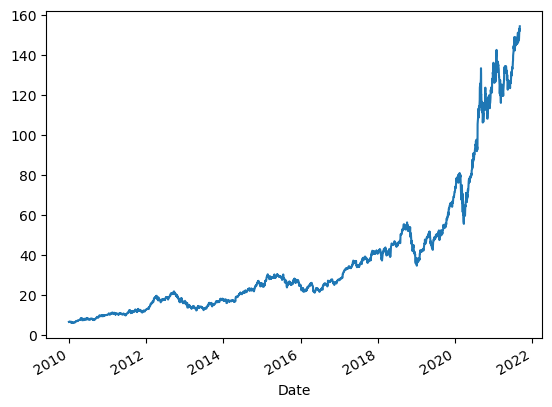

In [7]:
aapl['Adj Close'].plot()

In [8]:
def create_cumulative_abs(df):
    df['Cumulative Absolute'] = df["Adj Close"] - df['Adj Close'].iloc[0]
    
    return df

In [9]:
aapl = create_cumulative_abs(aapl)

In [10]:
aapl

,Open,High,Low,Close,Adj Close,Volume,Cumulative Absolute
Date,,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800,0.000000
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,0.100582
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,0.111927
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,0.007360
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,-0.004601
...,...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700,146.657987
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100,145.367993
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700,146.047986


In [11]:
amzn = create_cumulative_abs(amzn)

In [12]:
ge = create_cumulative_abs(ge)

In [13]:
sp500 = create_cumulative_abs(sp500)

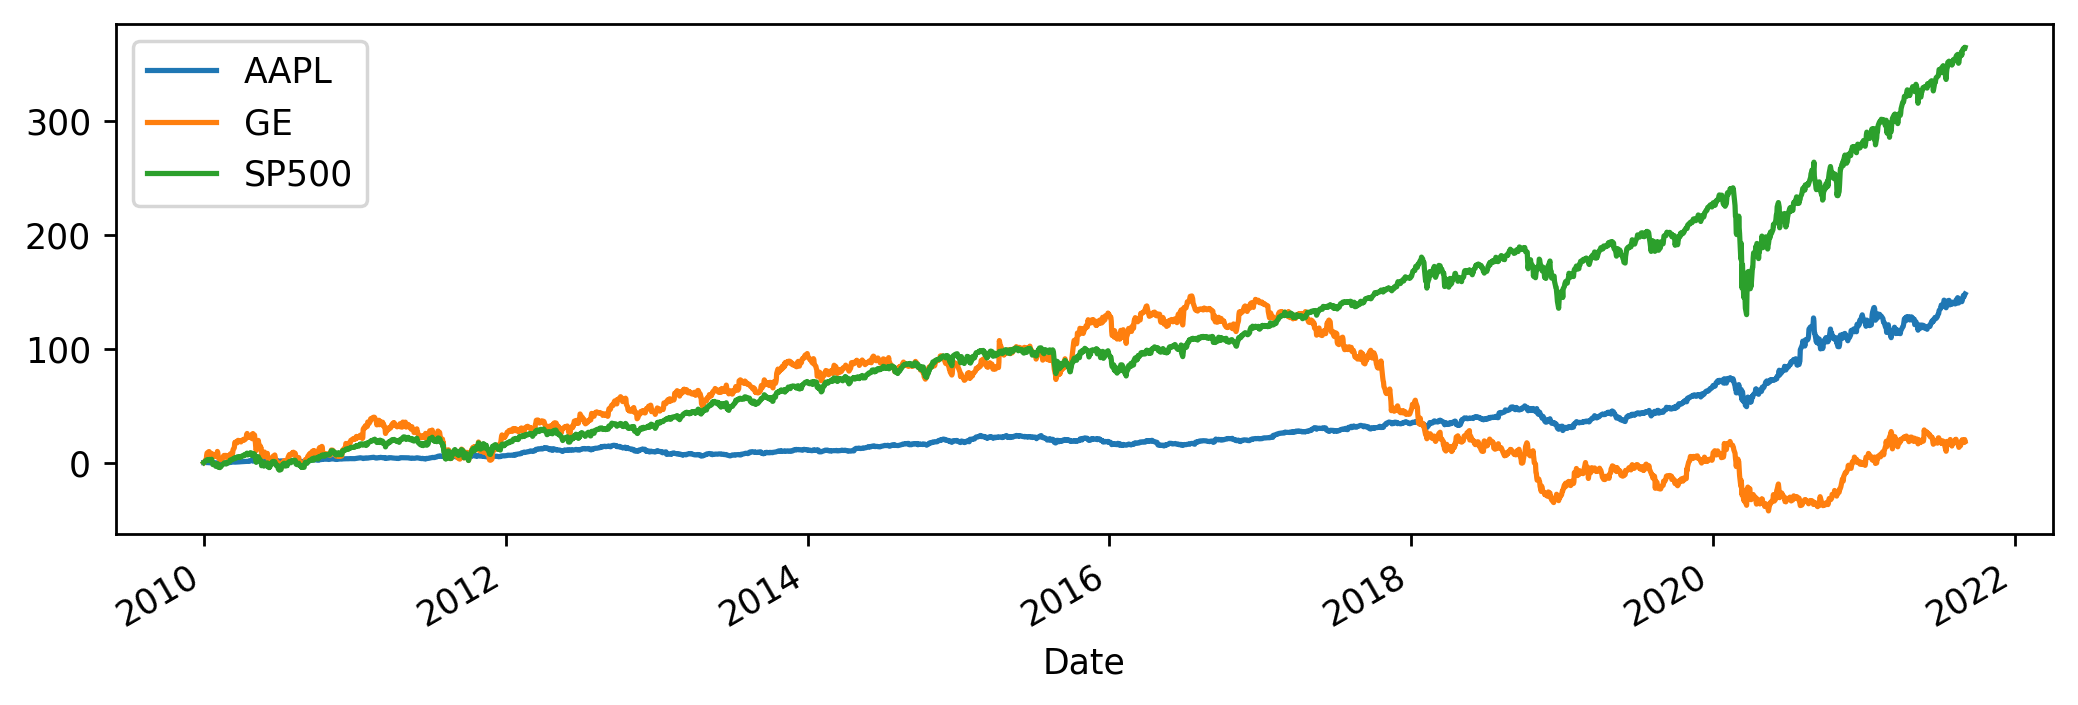

In [14]:
# Comparison plot
plt.figure(figsize=(10,3), dpi=250)
aapl['Cumulative Absolute'].plot(label='AAPL')
ge['Cumulative Absolute'].plot(label='GE')
#amzn['Cumulative Absolute'].plot(label='AMZN')
sp500['Cumulative Absolute'].plot(label='SP500')
plt.legend()

In [15]:
def calc_cum_perc(df):
    df['Percent Change'] = 100* (df['Adj Close']-df['Adj Close'].iloc[0])/df['Adj Close'].iloc[0]
    return df

In [16]:
aapl = calc_cum_perc(aapl)
aapl

,Open,High,Low,Close,Adj Close,Volume,Cumulative Absolute,Percent Change
Date,,,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800,0.000000,0.000000
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,0.100582,1.556515
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,0.111927,1.732071
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,0.007360,0.113904
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,-0.004601,-0.071201
...,...,...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700,146.657987,2269.541849
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100,145.367993,2249.579119
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700,146.047986,2260.102050


In [17]:
amzn = calc_cum_perc(amzn)
ge = calc_cum_perc(ge)
sp500 = calc_cum_perc(sp500)

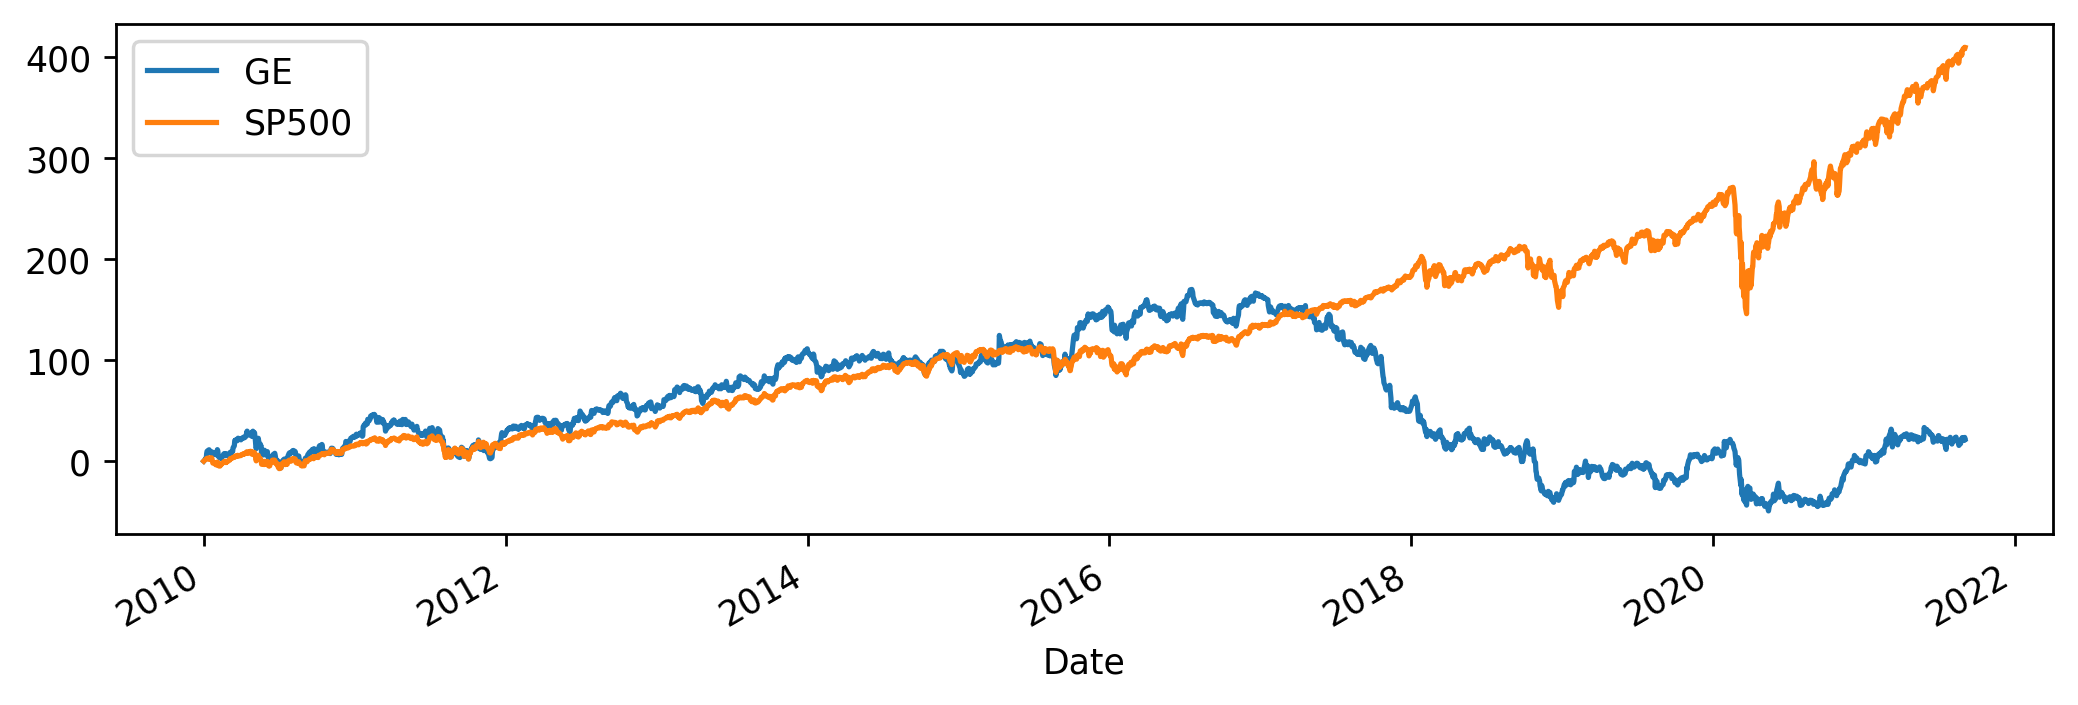

In [18]:
# Comparison plot
plt.figure(figsize=(10,3), dpi=250)
# aapl['Percent Change'].plot(label='AAPL')
# amzn['Percent Change'].plot(label='AMZN')
ge['Percent Change'].plot(label='GE')
sp500['Percent Change'].plot(label='SP500')
plt.legend()

In [19]:
aapl['Daily Returns'] = aapl['Adj Close'].pct_change(1)
sp500['Daily Returns'] = sp500['Adj Close'].pct_change(1)

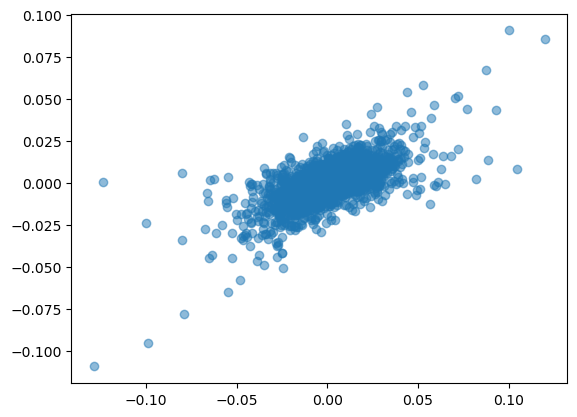

In [20]:
plt.scatter(aapl['Daily Returns'], sp500['Daily Returns'], alpha=0.5)

In [21]:
from scipy.stats import linregress 

In [22]:
amzn['Daily Returns'] = amzn['Adj Close'].pct_change(1)
ge['Daily Returns'] = ge['Adj Close'].pct_change(1)

In [23]:
vix['Daily Returns'] = vix['Adj Close'].pct_change(1)

In [24]:
aapl = aapl.dropna()

In [25]:
ge = ge.dropna()

In [26]:
vix = vix.dropna()

In [27]:
sp500 = sp500.dropna()

In [28]:
amzn = amzn.dropna()

In [29]:
def beta_and_alpha(df):
    
    beta, alpha, _, _, _ = linregress(sp500['Daily Returns'], df['Daily Returns'])
    
    return beta, alpha

In [30]:
beta_and_alpha(amzn)

(1.026474799622411, 0.0006735393441121329)

In [31]:
# Leveraged ETF
sp_lev_etf = pd.read_csv("sp_leveraged_2010.csv", 
                        parse_dates=True, 
                        index_col='Date')

In [32]:
sp_lev_etf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,9.787500,9.787500,9.552500,9.560000,9.009787,33780400
2010-01-04,9.715000,9.887500,9.715000,9.867500,9.299584,43924400
2010-01-05,9.867500,9.937500,9.780000,9.932500,9.360847,38780400
2010-01-06,9.910000,9.990000,9.892500,9.940000,9.367911,42499600
2010-01-07,9.907500,10.047500,9.850000,10.022500,9.445668,45704800
...,...,...,...,...,...,...
2021-08-30,131.880005,133.119995,131.750000,132.619995,132.619995,1258900
2021-08-31,132.550003,132.779999,131.869995,132.309998,132.309998,1763600
2021-09-01,132.809998,133.139999,132.229996,132.380005,132.380005,1402900


In [33]:
# Calculating cumulative percent
sp_lev_etf = calc_cum_perc(sp_lev_etf)

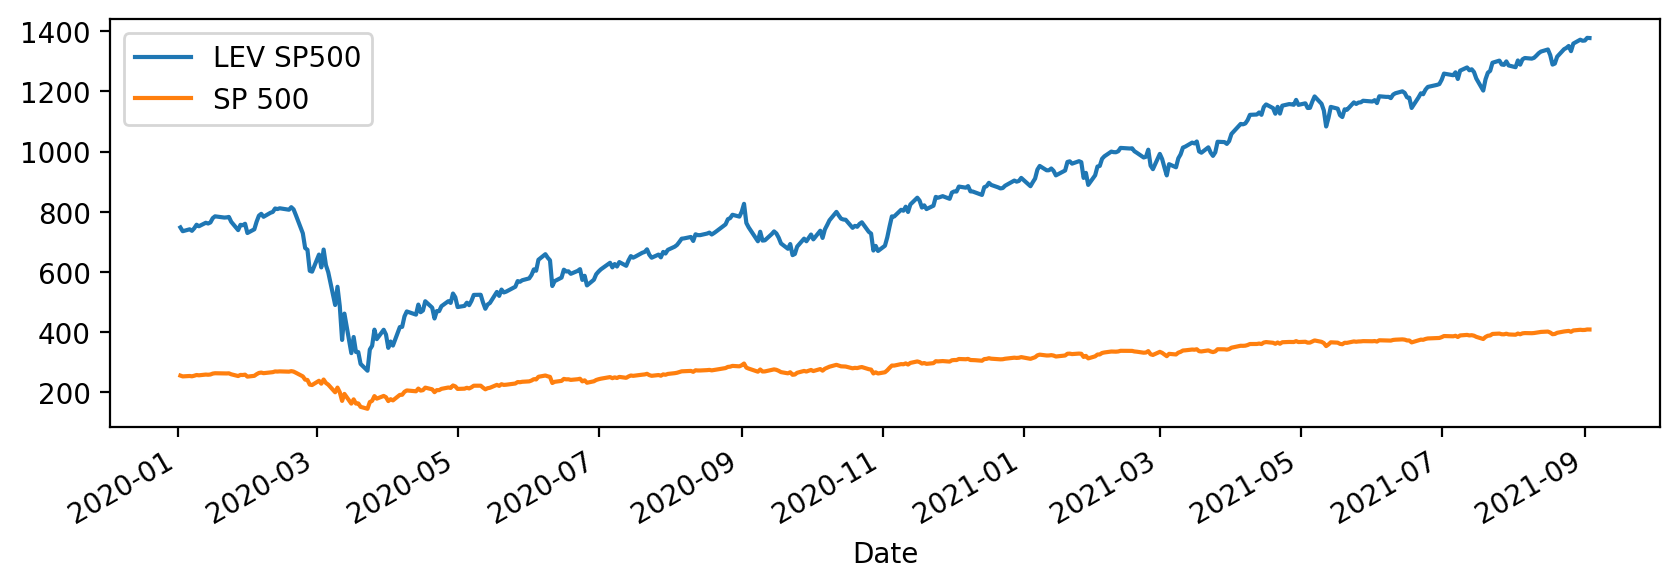

In [36]:
plt.figure(figsize=(10,3), dpi=200)
sp_lev_etf['Percent Change']['2020':'2021'].plot(label='LEV SP500')
sp500['Percent Change']['2020':'2021'].plot(label='SP 500')
plt.legend()

In [37]:
sp_lev_etf['Daily Returns'] = sp_lev_etf['Adj Close'].pct_change(1)

In [38]:
sp_lev_etf = sp_lev_etf.dropna()

In [39]:
beta_and_alpha(sp_lev_etf)

(2.010135618299088, -7.749523800499192e-05)